# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
# Fijamos el parámetro RANDOM_STATE
RANDOM_STATE = 333

# Apartado 1: Clustering

__Número de grupo: 15__

__Nombres de los estudiantes:__
- Daniela Alejanda Córdova
- David Bugoi
- Erik Karlgren Domercq

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import pandas as pd

df = pd.read_csv (r'countries_of_the_world.csv', index_col='Country')
df = df.drop(['Region'], axis=1)  # Eliminamos la columna 'Region'
df = df.dropna()                  # Eliminamos las filas a las que les falten valores
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


Tras eliminar los países de los que no sabemos algunos datos y la columna 'Region', tenemos en total 179 países (1 por cada fila) y tantas variables como columnas tiene el dataframe, es decir, 18.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
dp = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service']]
dp.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Significado de las variables
Viendo el rango de valores de cada una de las variables podemos deducir qué significa cada una de ellas:
- ***GDP ($ per capita)*:** Producto Interior Bruto (PIB) per cápita en dólares.
- ***Literacy (%)*:** porcentaje de la población que sabe leer y escribir o tasa de alfabetización.
- ***Phones (per 1000)*:** número de teléfonos por cada 1000 habitantes.
- ***Agriculture*, *Industry* y *Service*:** porcentaje del PIB dedicado a la agricultura, la industria y el sector servicios respectivamente.


### Análisis de cada variable
#### GDP ($ per capita)
La desviación típica (9644.12) es muy alta respecto a la media (9125.70), con lo que deducimos que hay una gran diferencia entre los países con mayor y menor PIB per cápita. De hecho vemos que el valor del tercer cuartil es alrededor de 2.5 veces mayor que el del primer cuartil, y el valor máximo es casi 3 veces mayor que el valor del tercer cuartil, lo que confirma nuestras conclusiones.

#### Literacy (%)
La tasa de alabetización es superior al 90% en alrededor de la mitad de los países analizados, y superior al 69.95% en el 75% de los países con mayor tasa de alfabetización, por lo que la mayoría de la población en la gran mayoría de países sabe leer y escribir. Solo vemos una reducción drástica en dicha tasa al comparar el primer cuartil con el país con menor tasa de alfabetización de todos. 

#### Phones (per 1000)
Al igual que con el PIB per cápita, tenemos una desviación típica alta (210.12) respecto a la media (208.15). Además, este valor crece exponencialmente de cada cuartil al siguiente, por lo que hay una gran diferencia entre los países con más moviles y los que menos.

#### Agriculture
De media (15%) es el sector económico menos importante de todos, y de hecho en la mitad de los países el sector agricultor no supera el 10% del PIB del país, lo que sugiere que la mitad de las economías del mundo no dependen en gran medida de este sector. Solo en un 25% de los países el sector agricultor supone más del 23% del PIB (significativamente por encima de la media), lo cual es porcentaje bastante importante. 

#### Industry
Este es el segundo sector económico más importante de media (28.8%) a nivel mundial. La desviación típica es menor en relación a la media que con el sector de la agricultura, por lo que hay menos países que dependan mucho o muy poco de la industria. De hecho las diferencias entre cuartiles en términos relativos (no absolutos) es bastante menor que en el caso del sector de la agricultura.

#### Service
El sector servicios es de media (55%) el sector económico más importante de los 3. Al igual que pasaba con la industria al compararla con la agricultura, el porcentaje del PIB del sector servicios tiene menor desviación típica que el de la industria. Esto indica que pocos países dependen mucho más o mucho menos de este sector que el resto de países y las diferencias relativas entre cuartiles no son grandes en comparación con los otros 2 sectores.

### Análisis de cada par de variables
Veamos las correlaciones par a par. Nos será útil dibujar las gráficas que agrupan a cada par de variables con `seaborn.pairplot()`.

In [4]:
# Correlaciones par a par
dp.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


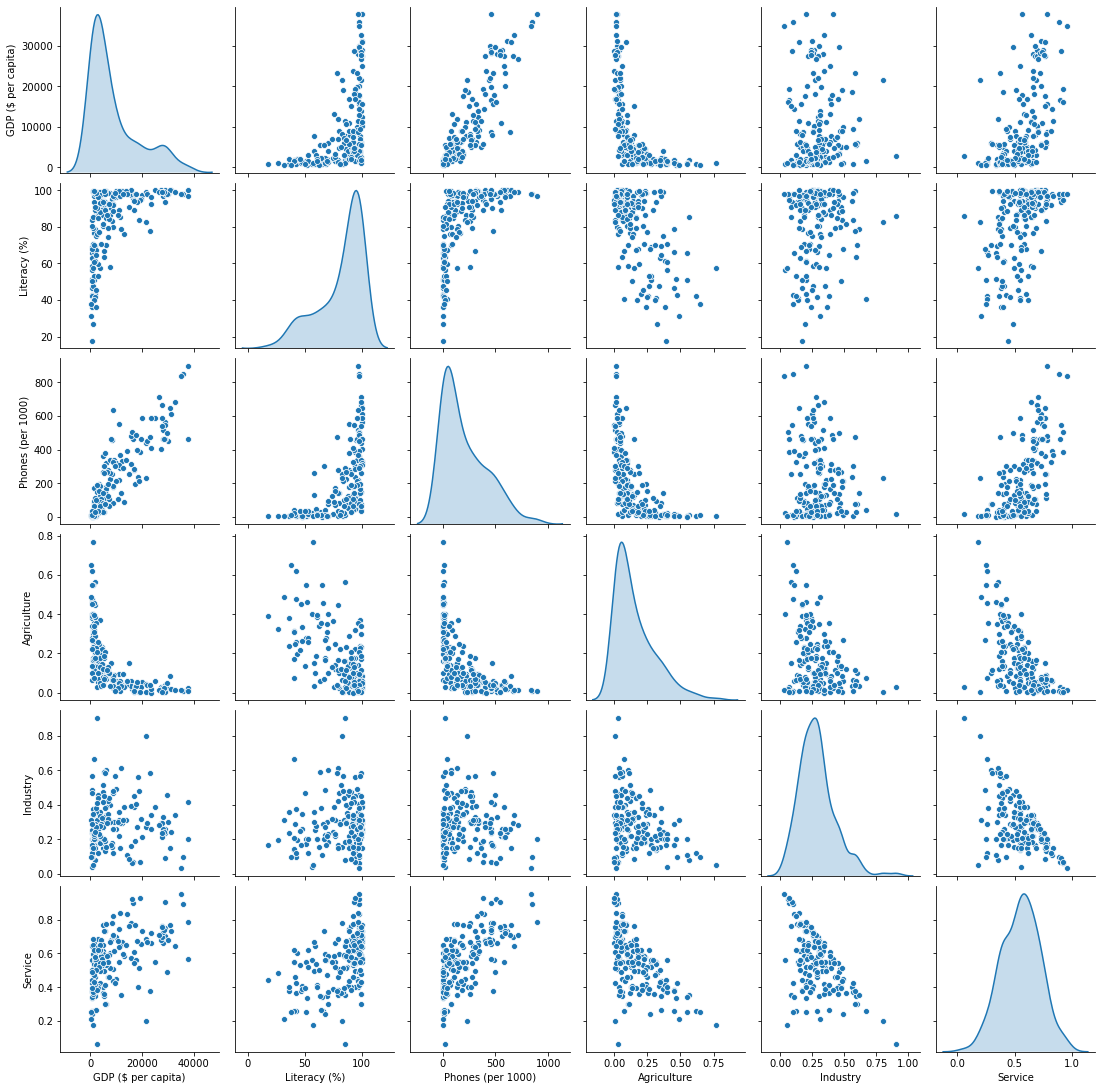

In [5]:
import seaborn as sns

# Gráficas par a par
sns.pairplot(dp, diag_kind='kde')

La correlación más alta entre cualquier par de variables es entre el PIB per cápita) y el número de teléfonos por cada 1000 habitantes, siendo de 0.88 (muy alta). Eso sugiere que debe haber una relación muy estrecha entre ambas variables.

Por otro lado, el porcentaje del PIB de la agricultura tiene una correlación negativa bastante fuerte (alrededor de -0.6) con el PIB per cápita, la tasa de alfabetización y el número de teléfonos por cada 1000 habitantes. Esto nos lleva a pensar que los países más ricos y con mayor educación no suelen tener un sector agrario importante.

El sector económico que mejor predice el PIB per cápita de un país es el sector servicios, pues es el que tiene una mayor correlación positiva con el PIB per cápita, mientras que la del sector industrial no tiene correlación alguna y no nos sirve para predecir la riqueza de un país. El sector servicios también tiene una correlación positiva bastante notable con la tasa de alfabetización y el número de teléfonos por cada 1000 habitantes. Lo primero podría ser debido a que los trabajos en este sector en muchas ocasiones requieren de un nivel mínimo de educación, mientras que lo segundo podría deberse a que

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [6]:
print('Número de elementos:', len(dp))
print('Primeros elementos de dp:', dp[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 179
Primeros elementos de dp:                     GDP ($ per capita)  Literacy (%)  Phones (per 1000)  \
Country                                                                   
Afghanistan                      700.0          36.0                3.2   
Albania                         4500.0          86.5               71.2   
Algeria                         6000.0          70.0               78.1   
Anguilla                        8600.0          95.0              460.0   
Antigua & Barbuda              11000.0          89.0              549.9   
Argentina                      11200.0          97.1              220.4   
Armenia                         3500.0          98.6              195.7   
Aruba                          28000.0          97.0              516.1   
Australia                      29000.0         100.0              565.5   
Austria                        30000.0          98.0              452.2   

                    Agriculture  Industry  Servi

NameError: name 'labels' is not defined

In [7]:
df.iloc[:, 1]

Country
Afghanistan            647500
Albania                 28748
Algeria               2381740
Anguilla                  102
Antigua & Barbuda         443
                       ...   
Venezuela              912050
Vietnam                329560
Yemen                  527970
Zambia                 752614
Zimbabwe               390580
Name: Area (sq. mi.), Length: 179, dtype: int64

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X,labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

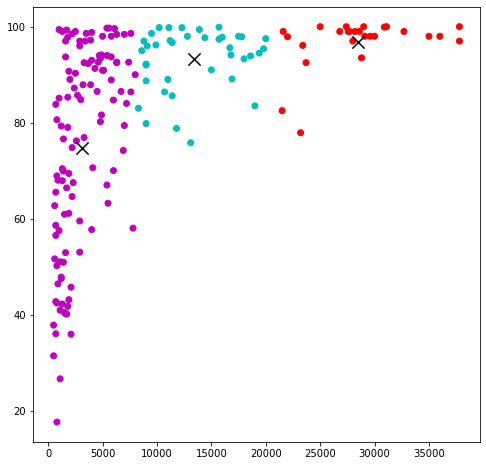

In [9]:
from sklearn.cluster import KMeans

# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)

# Agrupar los puntos en clusters
km.fit(dp)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_


plot_clusters(dp,labels,centers)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

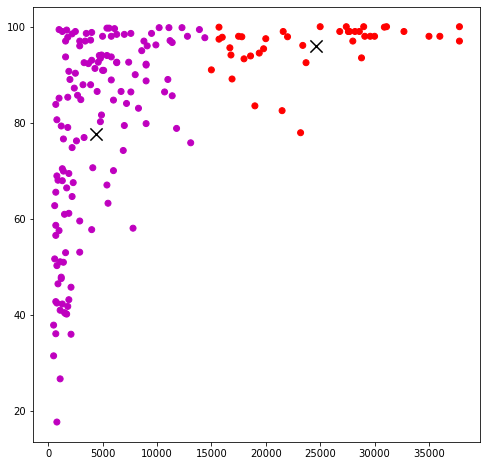

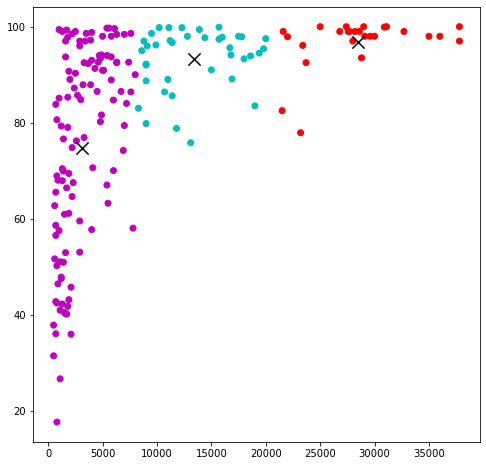

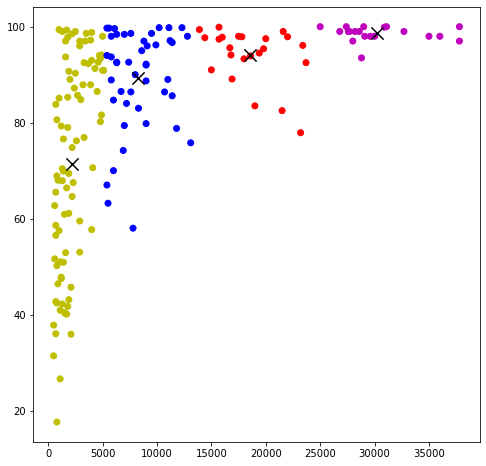

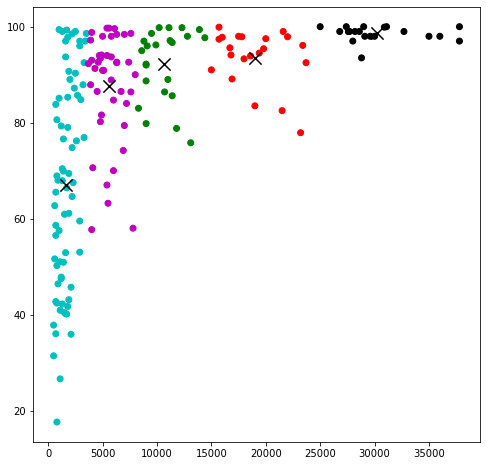

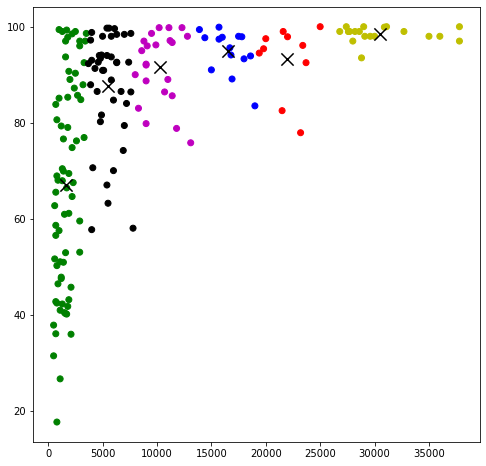

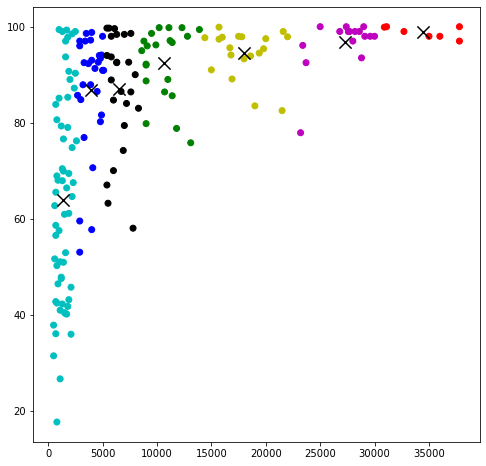

In [10]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 8
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(dp)
    plot_clusters(dp, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(dp)
    davies_boulding[k-2] = davies_bouldin_score(dp, km.labels_)
    silhouette[k-2] = silhouette_score(dp, km.labels_)

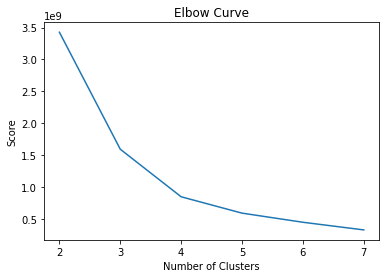

In [11]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

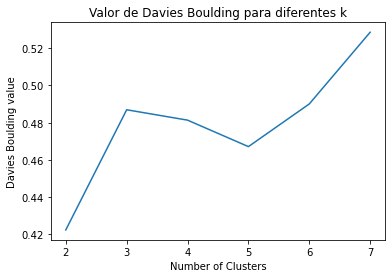

In [12]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

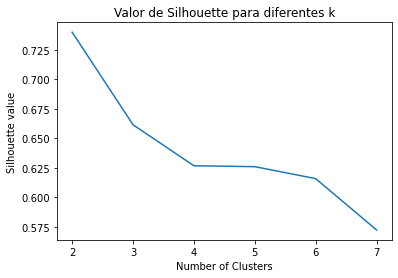

In [13]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [14]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(dp)

centers = km.cluster_centers_
centers

array([[2.85222222e+04, 9.69000000e+01, 5.57951852e+02, 2.26296296e-02,
        2.94296296e-01, 6.83037037e-01],
       [1.33789474e+04, 9.31921053e+01, 3.22755263e+02, 4.35789474e-02,
        2.98263158e-01, 6.57868421e-01],
       [3.11403509e+03, 7.46526316e+01, 8.71035088e+01, 2.26482456e-01,
        2.83131579e-01, 4.89614035e-01]])

In [15]:
import pandas as pd

# crear data frame con los puntos originales
dc = pd.DataFrame(data=dp)
# añadir una columna con el cluster al que pertenece cada punto
print(km.labels_)
dc = dc.assign(cluster=pd.Series(data=km.labels_))
dc

[2 2 2 1 1 1 2 0 0 0 2 1 1 2 1 2 0 2 2 0 2 2 1 2 1 1 2 2 2 2 2 2 2 0 2 2 1
 2 2 2 2 2 1 2 2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 0 1 1 2 2 2 0 2 1 2 2 2 2 2 2
 2 2 0 1 0 2 2 2 2 0 1 2 0 2 2 2 2 1 1 2 2 1 2 2 0 1 2 2 1 2 2 2 1 2 1 1 2
 2 2 2 0 1 1 0 2 2 2 0 1 2 1 2 2 2 2 2 1 1 1 0 2 2 2 1 2 2 2 2 1 2 2 2 0 2
 1 0 2 2 2 2 0 0 2 0 2 2 2 2 1 2 2 2 2 2 0 0 0 1 2 2 2 2 2 2 2]


,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,NaN
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,NaN
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,NaN
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,NaN
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,NaN
...,...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,NaN
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,NaN
Yemen,800.0,50.2,37.2,0.135,0.472,0.393,NaN


In [16]:
# mostramos la matriz transpuesta para que la info salga en vertical
dc.groupby(["cluster"]).describe().transpose()

IndexError: list index out of range

In [17]:
dc.groupby(["cluster"])["x"].plot.density()

KeyError: 'Column not found: x'

In [19]:
dc.groupby(["cluster"])["y"].plot.density()

KeyError: 'Column not found: y'